In [135]:
import matplotlib.pyplot as plt
from math import sin, cos, log

# 1. Нахождение приближённой сеточной производной по заданной сеточной функции

In [ ]:
y = [ 1.6990, 1.7404, 1.7782, 1.8129 ]
l, r = 50, 65
step = 5

In [ ]:
y = [-0.008, -0.066, -0.209, -0.439, -0.734, -1.044, -1.31, -1.484, -1.542,
     -1.491, -1.366, -1.218, -1.093, -1.02, -0.998, -1, -0.982, -0.901,
     -0.733, -0.479, -0.174, 0.128, 0.372, 0.513, 0.537, 0.46, 0.323, 0.177,
      0.065, 0.009, -0.002 ]
l, r = -3, 3
step = 0.2

In [ ]:
y = [-5, -4.597, -4.178, -3.727, -3.234, -2.688, -2.082, -1.411, -0.674, 0.131,
     1, 1.929, 2.91, 3.935, 4.99, 6.063, 7.134, 8.187, 9.198, 10.145, 11]
l, r = 0, 2
step = 0.1

In [ ]:
y = [0, 1.483, 2.739, 3.782, 4.647, 5.437, 6.363, 7.723, 9.749, 12.314, 14.659,
     15.538, 14.109, 11.222, 9.578, 11.331, 14.75, 15.096, 11.393, 9.66, 13.403]
l, r = 0, 4
step = 0.2

In [ ]:
y = [-4.045, 1.782, 2.279, 2.398, 2.322, 2.109, 1.784, 1.355, 0.83, 0.281, 0, 
     0.281, 0.83, 1.355, 1.784, 2.109, 2.322, 2.398, 2.279, 1.782, -4.045]
l, r = 0, 4
step = 0.2

In [ ]:
x = [l]
for i in range(len(y)-1): x.append(x[-1]+step)
dy = [[yi] for yi in y]
max_n_delta = 1
for i in range(max_n_delta):
    for j in range(len(y)-i-1):
        dy[j].append(dy[j+1][-1]-dy[j][-1])
drv = []
for i in range(len(dy)-1):
    drv.append(0)
    for j in range(1, len(dy[i])):
        drv[i] += dy[i][j]/j * (1 if j%2==1  else -1)
    drv[i] /= step

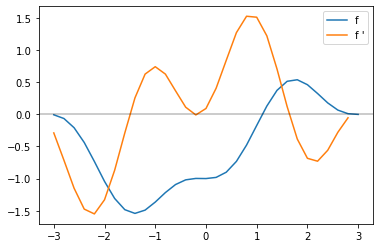

In [ ]:
plt.plot(x, y, label='f')
plt.plot(x[:-1], drv, label='f \'')
plt.axhline(0, color='black', linewidth=0.4)
plt.legend()

# 2. Интегрировать сеточную функцию на указанном интервале по обобщённому методу Симпсона

In [211]:
f = lambda x: sin(x)**3 - cos(x/2)**2 + 2
l, r = -3, 3
step = 0.2

In [199]:
f = lambda x: -x**4 + 3*x**3 + 4*x - 5
l, r = 0, 2
step = 0.1

In [215]:
f = lambda x: sin(x)**3 - 3*sin(x**2) + 4*sin(x) + 4*x
l, r = 0, 4
step = 0.2

In [207]:
f = lambda x: log(10*sin((3*x/5)**2) + 1)
l, r = -3, 3
step = 0.005

In [216]:
x = [l]
for i in range(int((r-l)/step)): x.append(x[-1]+step)
y = [f(xi) for xi in x]

In [217]:
S = 0
for i in range(len(y)):
    if i == 0 or i == len(y)-1:
        S += y[i] * 1
    elif i%2==0:
        S += y[i] * 2
    else:
        S += y[i] * 4
S *= step / 3

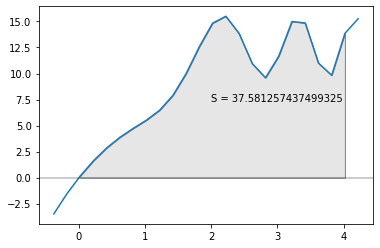

In [218]:
padding = (r-l)//step/10*step
l, r = l-padding, r+padding
x, y = [], []
for i in range(int((r-l)/step)+1):
    try: y.append(f(l+i*step))
    except: continue
    else: x.append(l+i*step)
l, r = l+padding, r-padding
plt.plot(x, y)
plt.axhline(0, color='black', linewidth=0.4)
plt.fill_between(x, y, where=[(l-step**2)<=xi<=(r+2*step**2) for xi in x], facecolor='0.9', edgecolor='0.5')
plt.text((l+r)/2, f((l+r)/2)/2, 'S = '+str(S));